<a href="https://colab.research.google.com/github/tharina11/Deep-Learning-Exercises/blob/main/5.%20CIFAR10_classification_with_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

####**Convolutional Neural Networks**

When a computer fed with an image, computer looks at images as grids of numbers. Artificial Neural Networks (ANN) go through all the pixels of these images during processing. This process could be very accurate, but consumes a huge amount of processing power.

Disadvantages of using ANN for image classification:
- Too much computation
- Treat local pixels same as pixels far apart
- Sensitive to location of an object in an image

Convolutional Neural Networks (CNN) are used to process multidimensional data such as multilayer images. The first layers of a CNN consists of convolutional and pooling layers. In these layers, a systematically selected set of pixel values from one layer are multiplied by a filter consists of weights, and connected to one pixel in the next layer after passing through a non-linear function. All selected pixel units of the first layer share the same filter.   

Some key ideas behind CNNs are local connections, shared weights, pooling and use of multiple layers.

First part of a CNN is responsible for **feature extraction**. Second part is responsible for **classification**.

Benefits of using CNN for image classification:
-  **Convolution**:
 - Connections sparsity reduces overfitting.
 - Cov + pooling: Gives location invariant feature detection
 - Parameter sharing

- **Activation function**:
 - Introduce nonlinearity
 - Speeds up training, faster to compute

- **Pooling**:
 - Reduce dimensions and computation
 - Reduces overfitting
 - Makes the model tolerant towards small distortions and variations

We create a feature map in a convolution operation. Some key features of a convolution operation:

stride - numeber of pixels the filter moves.

Feature map - Output of a convolution

Filter - Feature detector

Pooling - Used to reduce the size

CNN does not take care of rotation and scale itself. We use data augmentation methods to generate new rotated/scaled samples from existing training samples, to extract more information from the input data.

This project is mainly based on a couple of videos of [Codebasics](https://www.youtube.com/watch?v=zfiSAzpy9NM&list=PLeo1K3hjS3uu7CxAacxVndI4bE_o3BDtO&index=23&ab_channel=codebasics) youtube channel. In addition, some great additional source were refrerred. All the sources are cited at the end of this project description. 


####**CIFAR10 classification with ANN and CNN**

In [1]:
# Import libraries
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [10]:
# Load data and split into train and test sets
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()
x_train.shape

(50000, 32, 32, 3)

Check the shape of the training and testing data.

In [11]:
x_test.shape

(10000, 32, 32, 3)

In [12]:
x_train.shape[0]

50000

In [13]:
y_train.shape

(50000, 1)

In [14]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

Target variable is a 2D arrray. Let's reshape and convert it to a 1D array.

In [8]:
# Reshape the target variable
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [9]:
y_train.shape

(50000,)

Target classes are represented by numbers. View images and name the output classes.

In [ ]:
# Plot function
def plot_sample(x, y, index):
  plt.figure(figsize = (15, 2))
  plt.imshow(x_train[index])
  plt.xlabel(classes[y[index]])

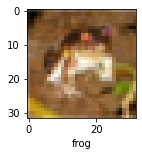

In [ ]:
plot_sample(x_train, y_train, 0)

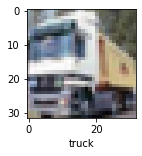

In [ ]:
plot_sample(x_train, y_train, 1)

In [ ]:
# Create a list of names of the output classes
classes = ['aeroplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [ ]:
# Transform the input data into the range between 0 and 1 to ease the convergence of the cost function
x_train = x_train / 255
x_test = x_test / 255

In [ ]:
# Build an ANN model and fit to the training data
model = keras.Sequential([
    keras.layers.Flatten(input_shape = (32, 32, 3)),
    keras.layers.Dense(3000, activation='relu'),
    keras.layers.Dense(1000, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

model.fit(x_train, y_train, epochs= 5)

Epoch 1/5
1563/1563 [==============================] - 10s 5ms/step - loss: 1.8944 - accuracy: 0.3244
Epoch 2/5
1563/1563 [==============================] - 8s 5ms/step - loss: 1.6660 - accuracy: 0.3997
Epoch 3/5
1563/1563 [==============================] - 8s 5ms/step - loss: 1.5849 - accuracy: 0.4330
Epoch 4/5
1563/1563 [==============================] - 8s 5ms/step - loss: 1.5287 - accuracy: 0.4522
Epoch 5/5
1563/1563 [==============================] - 8s 5ms/step - loss: 1.4909 - accuracy: 0.4672


In [ ]:
# Classification accuracy of ANN with 5 epochs
from sklearn.metrics import confusion_matrix, classification_report
y_pred = model.predict(x_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print('Classification Report: \n', classification_report(y_test, y_pred_classes))

313/313 [==============================] - 1s 2ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.43      0.65      0.52      1000
           1       0.65      0.53      0.58      1000
           2       0.33      0.33      0.33      1000
           3       0.33      0.31      0.32      1000
           4       0.48      0.23      0.31      1000
           5       0.37      0.39      0.38      1000
           6       0.46      0.54      0.50      1000
           7       0.51      0.54      0.52      1000
           8       0.55      0.57      0.56      1000
           9       0.53      0.50      0.52      1000

    accuracy                           0.46     10000
   macro avg       0.46      0.46      0.45     10000
weighted avg       0.46      0.46      0.45     10000



In [ ]:
# Build a CNN model and fit to the training data
cnn = keras.Sequential([
    
    #cnn
    layers.Conv2D(filters=32, kernel_size=(3,3), activation= 'relu', input_shape = (32,32,3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=64, kernel_size=(3,3), activation= 'relu'),
    layers.MaxPooling2D((2, 2)),


    #Dense
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(10, activation='softmax'),
    
])

In [ ]:
cnn.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [ ]:
cnn.fit(x_train, y_train,epochs = 10)

Epoch 1/10
1563/1563 [==============================] - 9s 5ms/step - loss: 1.5018 - accuracy: 0.4577
Epoch 2/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.1409 - accuracy: 0.6016
Epoch 3/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.0040 - accuracy: 0.6505
Epoch 4/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.9237 - accuracy: 0.6820
Epoch 5/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.8626 - accuracy: 0.7013
Epoch 6/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.8098 - accuracy: 0.7201
Epoch 7/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.7605 - accuracy: 0.7381
Epoch 8/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.7237 - accuracy: 0.7493
Epoch 9/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.6900 - accuracy: 0.7595
Epoch 10/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.661

In [ ]:
cnn.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.9602 - accuracy: 0.6796


[0.9602257609367371, 0.6796000003814697]

In [ ]:
y_test = y_test.reshape(-1,)
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

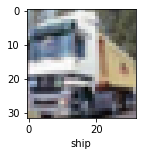

In [ ]:
plot_sample(x_test, y_test, 1)

In [ ]:
y_pred = cnn.predict(x_test)
y_pred[:5]

313/313 [==============================] - 1s 2ms/step


array([[1.23871863e-03, 1.61755932e-04, 2.45366083e-03, 8.07204366e-01,
        2.29944286e-04, 1.74367949e-01, 6.19077962e-03, 7.26302678e-05,
        7.98749086e-03, 9.27153233e-05],
       [1.21374987e-03, 3.01546510e-03, 1.20252207e-05, 4.04310555e-07,
        6.70226896e-09, 1.04064686e-08, 2.31148456e-09, 1.11045939e-09,
        9.95582998e-01, 1.75277659e-04],
       [5.04083894e-02, 4.05273467e-01, 1.04834244e-03, 6.34082477e-04,
        5.99713749e-05, 2.33193732e-05, 1.49255875e-03, 1.16812062e-05,
        1.81902632e-01, 3.59145552e-01],
       [3.07242692e-01, 2.81620235e-03, 1.12352185e-02, 8.37527768e-05,
        8.50122189e-04, 9.87151634e-06, 1.10418601e-04, 8.42391364e-06,
        6.76568568e-01, 1.07466942e-03],
       [6.59976251e-07, 1.63823461e-05, 7.94970989e-02, 2.45410390e-02,
        1.60995334e-01, 5.24046831e-03, 7.29681909e-01, 3.95708275e-06,
        2.29393136e-05, 2.16455746e-07]], dtype=float32)

In [ ]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 1, 8, 6]

In [ ]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

In [ ]:
# Accuracy of the cnn classification after 10 epochs
print('Classification Report:\n',classification_report(y_test, y_classes))

Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.67      0.71      1000
           1       0.74      0.86      0.80      1000
           2       0.53      0.62      0.57      1000
           3       0.49      0.54      0.51      1000
           4       0.64      0.68      0.66      1000
           5       0.69      0.41      0.52      1000
           6       0.66      0.84      0.74      1000
           7       0.86      0.64      0.73      1000
           8       0.74      0.83      0.78      1000
           9       0.78      0.71      0.74      1000

    accuracy                           0.68     10000
   macro avg       0.69      0.68      0.68     10000
weighted avg       0.69      0.68      0.68     10000



- [Simple explanation of convolutional neural network](https://www.youtube.com/watch?v=zfiSAzpy9NM&list=PLeo1K3hjS3uu7CxAacxVndI4bE_o3BDtO&index=23&ab_channel=codebasics)
- [Simple explanation of convolutional neural network](https://www.youtube.com/watch?v=zfiSAzpy9NM&list=PLeo1K3hjS3uu7CxAacxVndI4bE_o3BDtO&index=23&ab_channel=codebasics)
- [Deep Learning](https://www.researchgate.net/publication/277411157_Deep_Learning)
